#### Tank 22MT02  - 20 tonne tank 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

C:\Users\User\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
uploaded = pd.read_csv('Bev Base Dearation Data Extract .csv')
# Dataset is now stored in a Pandas Dataframe

In [3]:
#uploaded.head()

In [4]:
# Or rename the existing DataFrame (rather than creating a copy)
uploaded.rename(columns={'SKU': 'Material','Deaeration Phase':'Deaeration_Phase'}, inplace=True)

In [5]:
# Removal of unwanted columns from dataset
uploaded1=uploaded.drop(['SKU_DESCRIPTION', 'Recipe', 'Tank','Source', 'Batch_Phase_Type','Phase_start','Phase_end','Deaeration_Phase','Phase_row_no','Instruction_Step','Material_Name'], axis=1)

In [6]:
# Define a dictionary of replacements
replacements = {
    'U_25MT02': '2502',
    'U_25MT03': '2503',
    'U_25MT04': '2504',
    'U_26MT01' : '2601',
    'U_23MT02' : '2302',
    'U_23MT04' : '2304',
    'U_25MT01' : '2501',
    'U_23MT05' : '2305',
    'U_25MT02' : '2502',
    'U_22MT04' : '2204',
    'U_22MT03' : '2203',
    'U_22MT02' : '2202',
    'U_26MT04' : '2604',
    'U_26MT03' : '2603',
    'U_23MT03' : '2303',
    'U_22MT05' : '2205'
}

# Replace values in the 'TankName' column
uploaded1['Unit'].replace(replacements, inplace=True)

# Print the modified DataFrame
#print(uploaded1)

In [7]:
#uploaded1.info()

In [8]:
#Select the batches where 22MT03 tanks was used
Unit = ['2202']
TANK_2202= uploaded1[uploaded1['Unit'].isin(Unit)]
print(TANK_2202)

      Material    BATCHID  Unit Material_ID  Quantity  Phase_duration  \
2001   1397022  107956670  2202         NaN     0.000               0   
2002   1397022  107956670  2202     1002565  8623.000              10   
2003   1397022  107956670  2202         NaN     0.000              20   
2004   1397022  107956670  2202     1037802    19.446              17   
2005   1397022  107956670  2202     1002818   516.000               8   
...        ...        ...   ...         ...       ...             ...   
7746   1775253  108026760  2202         NaN     0.000               1   
7747   1775253  108026760  2202         NaN     0.000               8   
7748   1775253  108026760  2202         NaN     0.000               0   
7749   1775253  108026760  2202         NaN     0.000               0   
7750   1775253  108026760  2202         NaN     0.000               0   

      Phase_start_delay  Flowrate_KGMIN  Target_Flowrate  \
2001                  0          0.0000              NaN   
200

### Creation Dataframes based on the ingredients addition - quantity , flow rates , duration times , overrun times and targets for each 

## ingredients addition

## 1 Addition of Treated Water- 2 phase additions with different quantities

NB : Need to separate out the water additions

In [9]:
#Select all the rows where the phase HP is in the list below - HP is homogenisation of the final batch quantity
Material_ID = ['1002565']
df_IDW_2202 = TANK_2202[TANK_2202['Material_ID'].isin(Material_ID)]
print(df_IDW_2202)

      Material    BATCHID  Unit Material_ID   Quantity  Phase_duration  \
2002   1397022  107956670  2202     1002565   8623.000              10   
2012   1397022  107956670  2202     1002565   2065.000              13   
2755   1428047  107993270  2202     1002565   5101.000               8   
2760   1428047  107993270  2202     1002565     85.394               2   
2763   1428047  107993270  2202     1002565   4490.000               8   
2767   1428047  107993270  2202     1002565   1879.000              32   
2818   1428047  108033603  2202     1002565   5104.000               7   
2823   1428047  108033603  2202     1002565     85.000               2   
2826   1428047  108033603  2202     1002565   4491.000               7   
2830   1428047  108033603  2202     1002565   1886.000              32   
2976   1451704  108073632  2202     1002565   5979.000               9   
2984   1451704  108073632  2202     1002565   3126.000              10   
4041   1520984  108045117  2202     10

In [10]:
import pandas as pd
# Assuming df_filtered1 DataFrames are defined
# Create a new column 'QuantityRange' in df_filtered1 based on the 'Quantity' values
df_IDW_2202['QuantityRange'] = pd.cut(df_IDW_2202['Quantity'], bins=2, labels=['QuantityRange <= 5000', 'QuantityRange >= 5000'])
print(df_IDW_2202)

      Material    BATCHID  Unit Material_ID   Quantity  Phase_duration  \
2002   1397022  107956670  2202     1002565   8623.000              10   
2012   1397022  107956670  2202     1002565   2065.000              13   
2755   1428047  107993270  2202     1002565   5101.000               8   
2760   1428047  107993270  2202     1002565     85.394               2   
2763   1428047  107993270  2202     1002565   4490.000               8   
2767   1428047  107993270  2202     1002565   1879.000              32   
2818   1428047  108033603  2202     1002565   5104.000               7   
2823   1428047  108033603  2202     1002565     85.000               2   
2826   1428047  108033603  2202     1002565   4491.000               7   
2830   1428047  108033603  2202     1002565   1886.000              32   
2976   1451704  108073632  2202     1002565   5979.000               9   
2984   1451704  108073632  2202     1002565   3126.000              10   
4041   1520984  108045117  2202     10

<ipython-input-10-3716f9fd194b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_IDW_2202['QuantityRange'] = pd.cut(df_IDW_2202['Quantity'], bins=2, labels=['QuantityRange <= 5000', 'QuantityRange >= 5000'])


In [11]:
# Or rename the existing DataFrame (rather than creating a copy)
df_IDW_2202.rename(columns={'Quantity': 'WaterQuantity','Phase_duration':'WaterPhase_duration','Phase_start_delay':'WaterPhase_start_delay','Flowrate_KGMIN':'WaterFlowrate_KGMIN','Phase_overrun':'WaterPhase_overrun','QuantityRange':'WaterQuantityRange'}, inplace=True)

C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [12]:
#QuantityRange = ['QuantityRange >= 5000']
#df_Material_IDWater1= df_IDW_2601[df_IDW_2202['QuantityRange'].isin(QuantityRange)]
#print(df_Material_IDWater1)

In [13]:
#QuantityRange = ['QuantityRange <= 5000']
#df_Material_IDWater2 = df_IDW_2202[df_IDW_2202['QuantityRange'].isin(QuantityRange)]
#print(df_Material2202_IDWater2)

In [14]:
 #Aggregate data per tank
#aggregated_dfWater2 = df_Material_IDWater2.groupby('Material').agg({
    #'Phase_duration': 'mean',
    #'Phase_overrun': 'sum',
    #'Phase_start_delay':'sum',
    #'Quantity':'sum',
    #'Flowrate_KGMIN':'sum',
   # 'Target_Phase_duration':'sum',
   # 'Target_Flowrate':'sum'
#}).reset_index()

 #Print the aggregated DataFrame
#print(aggregated_dfWater2)

In [15]:
#Aggregate data per tank
#aggregated_dfWater1 = df_Material_IDWater1.groupby('Material').agg({
    #'Phase_duration': 'mean',
   # 'Phase_overrun': 'sum',
   # 'Phase_start_delay':'sum',
   # 'Quantity':'sum',
   # 'Flowrate_KGMIN':'sum',
   # 'Target_Phase_duration':'sum',
   # 'Target_Flowrate':'sum'
#}).reset_index()

 #Print the aggregated DataFrame
#print(aggregated_dfWater1)

## Addition of Preservative - 1037802- Pres1- Only used in 3 batches 

In [16]:
Material_ID = ['1037802']
df_IDP1_2202=TANK_2202[TANK_2202['Material_ID'].isin(Material_ID)]
df_IDP1_2202.rename(columns={'Quantity': 'Pres1Quantity','Phase_duration':'Pres1Phase_duration','Phase_start_delay':'Pres1Phase_start_delay','Flowrate_KGMIN':'Pres1Flowrate_KGMIN','Phase_overrun':'Pres1Phase_overrun'}, inplace=True)
#print(df_IDP1_2202)

In [17]:
# Or rename the existing DataFrame (rather than creating a copy)
df_IDP1_2202.rename(columns={'Quantity': 'Pres1Quantity','Phase_duration':'Pres1Phase_duration','Phase_start_delay':'Pres1Phase_start_delay','Flowrate_KGMIN':'Pres1Flowrate_KGMIN','Phase_overrun':'Pres1Phase_overrun'}, inplace=True)

In [18]:
#Aggregate data per tank
aggregated_df_IDP1_2202 = df_IDP1_2202.groupby('Material').agg({
    'Pres1Phase_duration': 'mean',
    'Pres1Phase_overrun': 'sum',
    'Pres1Phase_start_delay':'sum',
    'Pres1Quantity':'sum',
    'Pres1Flowrate_KGMIN':'sum',
    'Target_Phase_duration':'sum',
    'Target_Flowrate':'sum'
}).reset_index()

 #Print the aggregated DataFrame
#print(aggregated_df_IDP1_2202)

## Addition of Preservative - 1002818- Pres2

In [19]:
Material_ID = ['1002818']
df_IDP2_2202=TANK_2202[TANK_2202['Material_ID'].isin(Material_ID)]
df_IDP2_2202.rename(columns={'Quantity':'Pres2Quantity','Phase_duration':'Pres2Phase_duration','Phase_start_delay':'Pres2Phase_start_delay','Flowrate_KGMIN':'Pres2Flowrate_KGMIN','Phase_overrun':'Pres2Phase_overrun'}, inplace=True)
print(df_IDP2_2202)

      Material    BATCHID  Unit Material_ID  Pres2Quantity  \
2005   1397022  107956670  2202     1002818        516.000   
2758   1428047  107993270  2202     1002818         68.326   
2821   1428047  108033603  2202     1002818         68.382   
2979   1451704  108073632  2202     1002818         48.321   
4044   1520984  108045117  2202     1002818         75.010   
4848   1648637  107867810  2202     1002818         57.235   
4915   1648637  107978116  2202     1002818         57.231   
7319   1775253  107899926  2202     1002818        120.925   
7559   1775253  107964410  2202     1002818        120.795   
7671   1775253  107999494  2202     1002818        120.863   
7700   1775253  108026759  2202     1002818        120.698   

      Pres2Phase_duration  Pres2Phase_start_delay  Pres2Flowrate_KGMIN  \
2005                    8                       0              64.5000   
2758                    3                       0              22.7753   
2821                    6        

In [20]:
#Aggregate data per tank
#aggregated_df_IDP2_2202 = df_IDP2_2202.groupby('Material').agg({
    #'Pres2Phase_duration': 'mean',
    #'Pres2Phase_overrun': 'sum',
    #'Pres2Phase_start_delay':'sum',
    #'Pres2Quantity':'sum',
   # 'Pres2Flowrate_KGMIN':'sum',
   # 'Target_Phase_duration':'sum',
   # 'Target_Flowrate':'sum'
#}).reset_index()

 #Print the aggregated DataFrame
#print(aggregated_df_IDP2_2202)

## Addition of GUM (1461896,1234972,1031006)

In [21]:
Material_ID = ['1461896','1254972','1031006','1243269']
df_IDGUM_2202=TANK_2202[TANK_2202['Material_ID'].isin(Material_ID)]
# Or rename the existing DataFrame (rather than creating a copy)
df_IDGUM_2202.rename(columns={'Quantity': 'GUMQuantity','Phase_duration':'GUMPhase_duration','Phase_start_delay':'GUMPhase_start_delay','Flowrate_KGMIN':'GUMFlowrate_KGMIN','Phase_overrun':'GUMPhase_overrun'}, inplace=True)
print(df_IDGUM_2202)

      Material    BATCHID  Unit Material_ID  GUMQuantity  GUMPhase_duration  \
2008   1397022  107956670  2202     1461896     3500.000                 45   
2010   1397022  107956670  2202     1254972      396.000                 15   
2761   1428047  107993270  2202     1461896     1500.000                 24   
2765   1428047  107993270  2202     1461896     2000.000                 56   
2824   1428047  108033603  2202     1461896     1500.000                 28   
2828   1428047  108033603  2202     1461896     2000.000                 10   
2981   1451704  108073632  2202     1461896     2000.000                 58   
2982   1451704  108073632  2202     1254972       19.350                414   
4045   1520984  108045117  2202     1461896     1500.000                155   
4849   1648637  107867810  2202     1461896     1000.000                462   
4850   1648637  107867810  2202     1254972      144.778                  5   
4916   1648637  107978116  2202     1461896     1000

C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [22]:
#Aggregate data per tank
#aggregated_df_IDGUM_2202= df_IDGUM_2202.groupby('Material').agg({
    #'GUMPhase_duration': 'mean',
   # 'GUMPhase_overrun': 'sum',
   # 'GUMPhase_start_delay':'sum',
   # 'GUMQuantity':'sum',
   # 'GUMFlowrate_KGMIN':'sum',
    #'Target_Phase_duration':'sum',
    #'Target_Flowrate':'sum'
#}).reset_index()

 #Print the aggregated DataFrame
#print(aggregated_df_IDGUM_2202)

## Addition of Preservative - 1002874- Pres3

In [23]:
Material_ID = ['1002874']
df_IDP3_2202=TANK_2202[TANK_2202['Material_ID'].isin(Material_ID)]
# Or rename the existing DataFrame (rather than creating a copy)
df_IDP3_2202.rename(columns={'Quantity': 'Pres3Quantity','Phase_duration':'Pres3Phase_duration','Phase_start_delay':'Pres3Phase_start_delay','Flowrate_KGMIN':'Pres3Flowrate_KGMIN','Phase_overrun':'Pres3Phase_overrun'}, inplace=True)
print(df_IDP3_2202)

      Material    BATCHID  Unit Material_ID  Pres3Quantity  \
2978   1451704  108073632  2202     1002874         12.620   
4043   1520984  108045117  2202     1002874         20.010   
4847   1648637  107867810  2202     1002874         15.287   
4914   1648637  107978116  2202     1002874         15.264   
7318   1775253  107899926  2202     1002874         27.107   
7558   1775253  107964410  2202     1002874         27.008   
7670   1775253  107999494  2202     1002874         27.119   
7699   1775253  108026759  2202     1002874         27.107   

      Pres3Phase_duration  Pres3Phase_start_delay  Pres3Flowrate_KGMIN  \
2978                  206                       0               0.0613   
4043                   24                       0               0.8338   
4847                    7                       0               2.1839   
4914                   10                       0               1.5264   
7318                   13                       1               2.0852 

C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [24]:
#Aggregate data per tank
#aggregated_df_IDP3_2202 = df_IDP3_2202.groupby('Material').agg({
   # 'Pres3Phase_duration': 'mean',
    #'Pres3Phase_overrun': 'sum',
    #'Pres3Phase_start_delay':'sum',
    #'Pres3Quantity':'sum',
    #'Pres3Flowrate_KGMIN':'sum',
    #'Target_Phase_duration':'sum',
    #'Target_Flowrate':'sum'
#}).reset_index()

 #Print the aggregated DataFrame
#print(aggregated_df_IDP3_2202)

## Colour Addition - There are only 3 batches that have colour ingredients included that were produced in Tank 2202

In [25]:
#Material_ID = ['3026582','3010810','3028657']
#df_IDCOL_2202=TANK_2202[TANK_2202['Material_ID'].isin(Material_ID)]
#print(df_IDCOL_2202)

In [26]:
# Or rename the existing DataFrame (rather than creating a copy)
#df_IDCOL_2202.rename(columns={'Quantity': 'COLQuantity','Phase_duration':'COLPhase_duration','Phase_start_delay':'COLPhase_start_delay','Flowrate_KGMIN':'COLFlowrate_KGMIN','Phase_overrun':'COLPhase_overrun'}, inplace=True)

In [27]:
#Aggregate data per tank
#aggregated_df_IDCOL_2202 = df_IDCOL_2202.groupby('Material').agg({
    #'COLPhase_duration': 'mean',
    #'COLPhase_overrun': 'sum',
   # 'COLPhase_start_delay':'sum',
   # 'COLQuantity':'sum',
   # 'COLFlowrate_KGMIN':'sum',
   # 'Target_Phase_duration':'sum',
   # 'Target_Flowrate':'sum'
#}).reset_index()

 #Print the aggregated DataFrame
#print(aggregated_df_IDCOL_2202)

In [34]:
frames = [df_IDW_2202,df_IDGUM_2202,df_IDP2_2202,df_IDP3_2202]

result = pd.concat(frames)
print(result)

      Material    BATCHID  Unit Material_ID  WaterQuantity  \
2002   1397022  107956670  2202     1002565       8623.000   
2012   1397022  107956670  2202     1002565       2065.000   
2755   1428047  107993270  2202     1002565       5101.000   
2760   1428047  107993270  2202     1002565         85.394   
2763   1428047  107993270  2202     1002565       4490.000   
...        ...        ...   ...         ...            ...   
4914   1648637  107978116  2202     1002874            NaN   
7318   1775253  107899926  2202     1002874            NaN   
7558   1775253  107964410  2202     1002874            NaN   
7670   1775253  107999494  2202     1002874            NaN   
7699   1775253  108026759  2202     1002874            NaN   

      WaterPhase_duration  WaterPhase_start_delay  WaterFlowrate_KGMIN  \
2002                 10.0                     1.0             862.3000   
2012                 13.0                     0.0             158.8462   
2755                  8.0        

<Axes: >

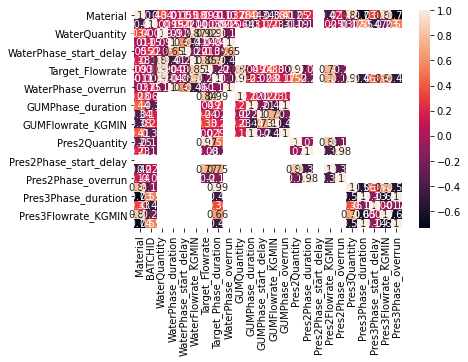

In [36]:
correlation_matrix = result.corr()
sns.heatmap(correlation_matrix, annot=True)


<Axes: xlabel='Pres3Phase_duration', ylabel='Pres3Phase_overrun'>

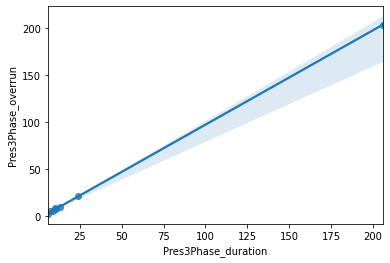

In [37]:
sns.regplot(x='Pres3Phase_duration',y='Pres3Phase_overrun',data=result)

## Effect of Agitation after ingredient addition

In [29]:
#Select all the rows where the material is in the list below
Instruction_Step = ['STEP1_AGITATION','STEP2_AGITATION']
df_Agitation = TANK_2202[TANK_2202['Instruction_Step'].isin(Instruction_Step)]
#print(df_Agitation)

KeyError: 'Instruction_Step'

In [ ]:
#Aggregate data per tank
aggregated_df_Agitation = df_Agitation.groupby('Material').agg({
    'Phase_duration': 'mean',
    'Phase_overrun': 'sum',
    'Phase_start_delay':'sum',
    'Quantity':'sum',
    'Flowrate_KGMIN':'sum',
    'Target_Phase_duration':'sum',
    'Target_Flowrate':'sum'
}).reset_index()

 #Print the aggregated DataFrame
print(aggregated_df_Agitation)